#### Gradient Descent Regressor from scratch

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

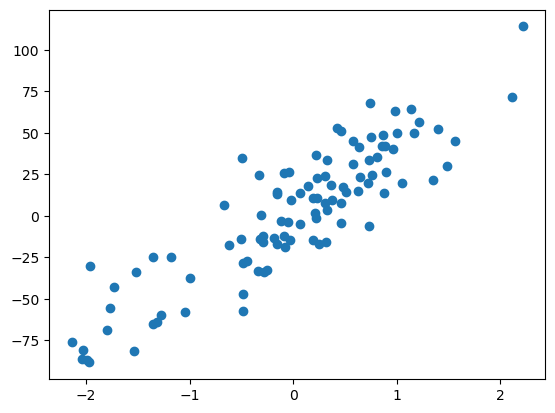

In [69]:
plt.scatter(x,y)
plt.show()

Fetching actual scikit learn regression results

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()

In [64]:
lr.fit(x,y)
print('Scikit Learn Results for Coefficient and Intercept')
print(lr.coef_[0]) #coefficient values to be compared with 
print(lr.intercept_) #intercept value to be compared with

Scikit Learn Results for Coefficient and Intercept
37.709047874520465
1.7449486327352828


Creating class for gradient descent regressor 

In [60]:
class GDR:
    def __init__(self,m,b,learning_rate,epochs):
        self.m = m
        self.b = b
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self,x,y):
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y-self.m*x.ravel()-self.b)
            loss_slope_m = -2*np.sum((y-self.m*x.ravel()-self.b)*x.ravel())
            self.b = self.b - (self.lr*loss_slope_b)
            self.m = self.m - (self.lr*loss_slope_m)
        print('coef :',self.m,'intercept :',self.b)
        
    def predict(self,x):
        return self.m*x + self.b

In [61]:
gd = GDR(1,0,0.001,50)

In [67]:
print('Our Code Results for Coefficient and Intercept')
gd.fit(x,y)

Our Code Results for Coefficient and Intercept
coef : 37.709047874520444 intercept : 1.7449486327352839


In [76]:
results =gd.predict(x)

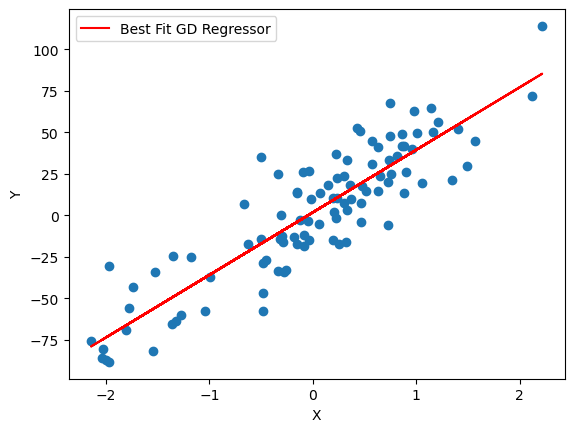

In [82]:
plt.scatter(x,y)
plt.plot(x,results,color='red',label='Best Fit GD Regressor')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()